# Curve Fitting

GraphingLib simplifies curve fitting down to a single line. First, import GraphingLib and numpy:

In [80]:
import graphinglib as gl
import numpy as np

Many common curve fit types have their dedicated objects which makes their use extremely easy. Guesses for the parameters can be provided for all fits, but they are not always necessary. Here are some examples:

**Polynomial**

[0.77769902 1.10676459 0.98549245 0.04801   ]


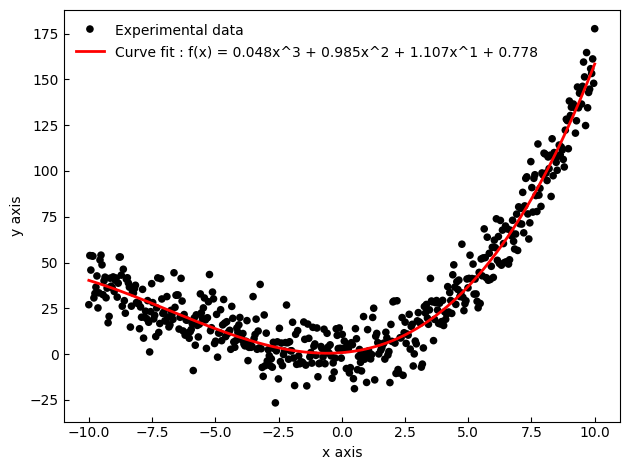

In [81]:
# Creating data
x_data = np.linspace(-10, 10, 500)
noise = np.random.normal(0, 10, len(x_data))
y_data = 0.05 * x_data ** 3 + x_data ** 2 + x_data + noise

# Create the Scatter object
scatter_data = gl.Scatter(x_data, y_data, label="Experimental data")

# Create the curve fit
fit = gl.FitFromPolynomial(scatter_data, degree=3, label="Curve fit", line_width=2)
print(fit.coeffs)

# Creat the Figure object
figure = gl.Figure()
figure.add_element(scatter_data, fit)
figure.generate_figure()

**Exponential**

[1.78988156 0.92004324 1.67614563]


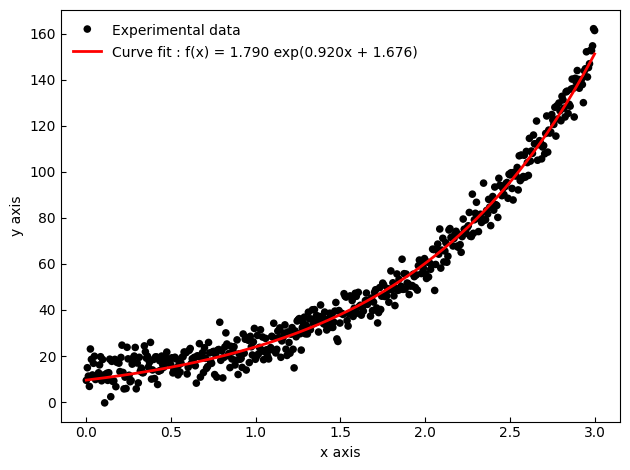

In [82]:
# Creating data
x_data = np.linspace(0, 3, 500)
noise = np.random.normal(0, 5, len(x_data))
y_data = 5 + np.e**(x_data + 2) + noise

# Create the Scatter object
scatter_data = gl.Scatter(x_data, y_data, label="Experimental data")

# Create the curve fit
fit = gl.FitFromExponential(scatter_data, label="Curve fit", line_width=2)
print(fit.parameters)

# Creat the Figure object
figure = gl.Figure()
figure.add_element(scatter_data, fit)
figure.generate_figure()

**Sinusoidal**

0.49966742713433954 2.004413283899493 3.1194069578985455 0.004728252799745885


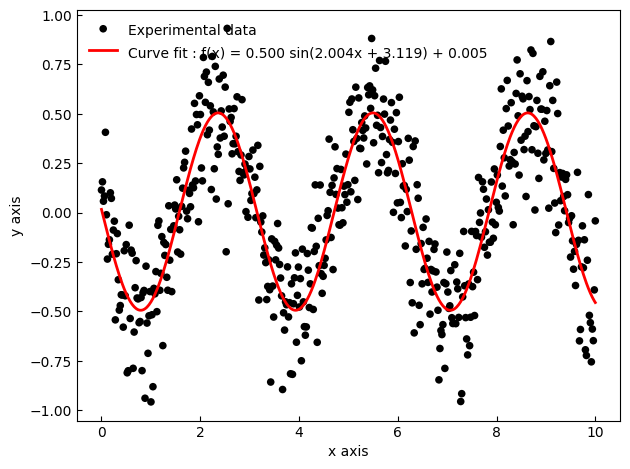

In [83]:
# Creating data
x_data = np.linspace(0, 10, 500)
noise = np.random.normal(0, 0.2, len(x_data))
y_data = 0.5*np.sin(2*x_data + np.pi) + noise

# Create the Scatter object
scatter_data = gl.Scatter(x_data, y_data, label="Experimental data")

# Create the curve fit
fit = gl.FitFromSine(scatter_data, label="Curve fit", line_width=2, guesses=[1, 2, 3, 4])
print(fit.amplitude, fit.frequency_rad, fit.phase, fit.vertical_shift)

# Creat the Figure object
figure = gl.Figure()
figure.add_element(scatter_data, fit)
figure.generate_figure()

**Logarithmic**

[3.96211744 1.09184958 0.15419921]


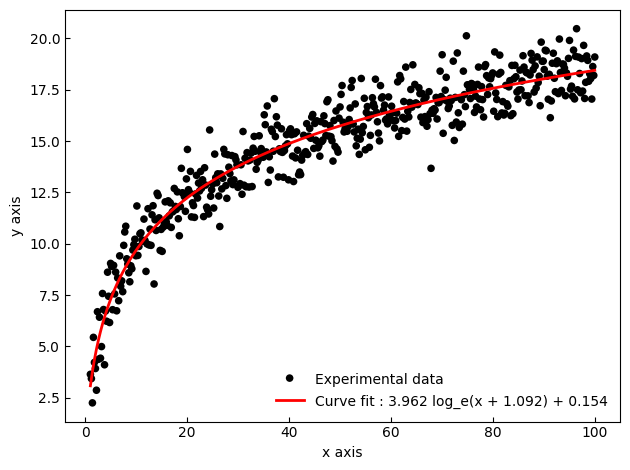

In [84]:
# Creating data
x_data = np.linspace(1, 100, 500)
noise = np.random.normal(0, 1, len(x_data))
y_data = 4* np.log(x_data + 1) + noise

# Create the Scatter object
scatter_data = gl.Scatter(x_data, y_data, label="Experimental data")

# Create the curve fit
fit = gl.FitFromLog(scatter_data, label="Curve fit", line_width=2)
print(fit.parameters)

# Creat the Figure object
figure = gl.Figure()
figure.add_element(scatter_data, fit)
figure.generate_figure()


**Square Root**

[ 4.10924857  5.99619511 -1.02537175]


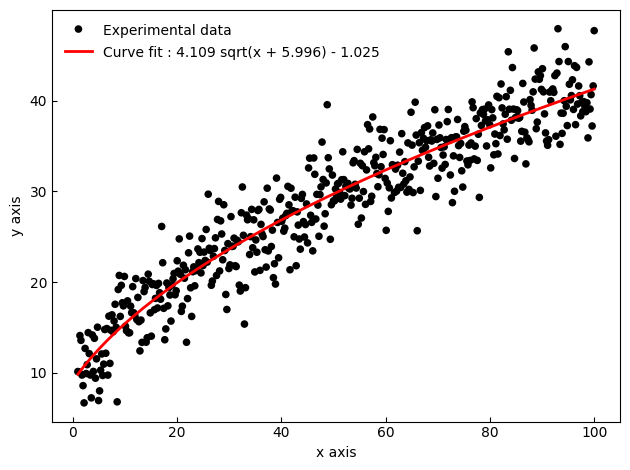

In [85]:
# Creating data
x_data = np.linspace(1, 100, 500)
noise = np.random.normal(0, 3, len(x_data))
y_data = 4 * np.sqrt(x_data + 5) + noise

# Create the Scatter object
scatter_data = gl.Scatter(x_data, y_data, label="Experimental data")

# Create the curve fit
fit = gl.FitFromSquareRoot(scatter_data, label="Curve fit", line_width=2)
print(fit.parameters)

# Creat the Figure object
figure = gl.Figure()
figure.add_element(scatter_data, fit)
figure.generate_figure()

**Gaussian**

4.001620440843724 3.0021587224413984 1.9960465057493288


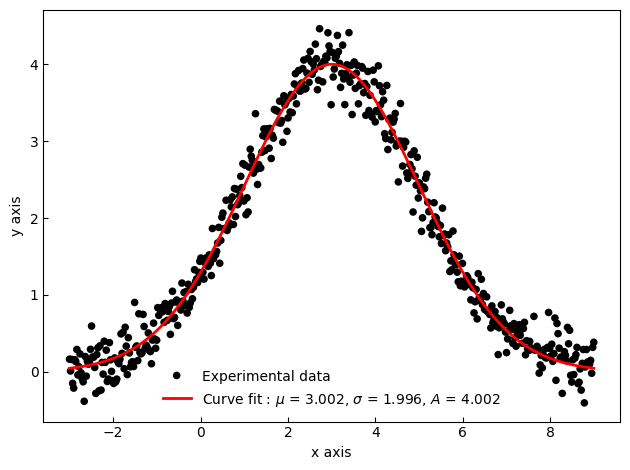

In [86]:
# Creating data
x_data = np.linspace(-3, 9, 500)
noise = np.random.normal(0, 0.2, len(x_data))
y_data = 4 * np.e**(-(1/2)*((x_data-3)/2)**2) + noise

# Create the Scatter object
scatter_data = gl.Scatter(x_data, y_data, label="Experimental data")

# Create the curve fit
fit = gl.FitFromGaussian(scatter_data, label="Curve fit", line_width=2)
print(fit.amplitude, fit.mean, fit.standard_deviation)

# Creat the Figure object
figure = gl.Figure()
figure.add_element(scatter_data, fit)
figure.generate_figure()

## Covariance matrix and uncertainty of parameters

